In [1]:
from utils import *
from utils.r import *
from utils.p import *
from skimage.color import rgb2lab
import numpy as np
from os import listdir

### Función de Verosimilitud

Creamos un histograma de píxeles pertenecientes a fuego, para cada uno de los 3 planos de color: $(L^*-a^*),\ (L^*-b^*)$ y $(a^*-b^*)$

$P(L^*, a^*, b^*) \stackrel{def}{=} P(L^*, a^*) P(L^*, b^*) P(a^*, b^*)$

Donde $P(L^*, a^*),\ P(L^*, b^*)$ y $P(a^*, b^*)$ son las funciones que denotan la verosimilitud de que $P(L^*, a^*),\ P(L^*, b^*)$ y $(a^*, b^*)$ pertenezcan a un fuego, respectivamente.

La función `ps` recibe las imágenes y las máscaras que segmentan el fuego presente en las mismas, y calcula estadísticamente los valores $P(L^*, a^*)$, $P(L^*, b^*)$, $P(a^*, b^*)$

Obtenemos variables globales `p1`, `p2`, `p3`

In [2]:
# buscar data set segmentado y usarlo acá
# p1, p2, p3 = ps(vec,masks)

p1 = np.zeros((24, 24))
p2 = np.zeros((24, 24))
p3 = np.zeros((24, 24))

p0 = np.zeros((24, 24))
p0[1:10, 2:5] = 1


def preparar_data_set():
    vec = []
    masks = []

    archivos_fuego = listdir("./images/imagenes_para_histograma/imgs")
    archivos_masks = listdir("./images/imagenes_para_histograma/masks")

    cantidad = 0

    for imagen_fuego_path in archivos_fuego:
        if cantidad > 50:
            break
        imagen_fuego = load_image(
            "./images/imagenes_para_histograma/imgs/" + str(imagen_fuego_path)
        )
        vec.append(rgb2lab(imagen_fuego))
        cantidad += 1

    cantidad = 0
    for mask_fuego_path in archivos_masks:
        if cantidad > 50:
            break
        mask_fuego = load_image(
            "./images/imagenes_para_histograma/masks/" + str(mask_fuego_path)
        )
        masks.append(mask_fuego)
        cantidad += 1

    return ps(vec, masks)


p1, p2, p3 = preparar_data_set()

with open("p1.txt", "wb") as f:
    np.savetxt(f, p1, fmt="%.10f")

with open("p2.txt", "wb") as f:
    np.savetxt(f, p2, fmt="%.10f")

with open("p3.txt", "wb") as f:
    np.savetxt(f, p3, fmt="%.10f")

Veamos los histogramas generados:

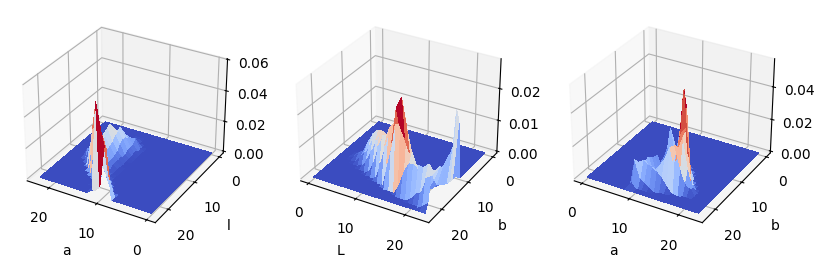

In [3]:
print_ps(p1, p2, p3)